**UČITAVANJE I ČIŠĆENJE PODATAKA**

Učitavanje potrebnih biblioteka i CSV datoteke:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

shot_data = pd.read_csv("shot_logs.csv")
shot_data.head(10)

Saving shot_logs.csv to shot_logs.csv


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,8:15,9.1,2,...,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148
6,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,7,4,10:15,14.5,11,...,20.7,2,missed,"Jack, Jarrett",101127,6.1,0,0,brian roberts,203148
7,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,8,4,8:00,3.4,3,...,3.5,2,made,"Plumlee, Mason",203486,2.1,1,2,brian roberts,203148
8,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,9,4,5:14,12.4,0,...,24.6,3,missed,"Morris, Darius",202721,7.3,0,0,brian roberts,203148
9,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,1,2,11:32,17.4,0,...,22.4,3,missed,"Ellington, Wayne",201961,19.8,0,0,brian roberts,203148


Provjeramo kakvi su podaci i što sve treba popraviti.

In [2]:
print(shot_data.shape)
print(shot_data.nunique())

(128069, 21)
GAME_ID                        904
MATCHUP                       1808
LOCATION                         2
W                                2
FINAL_MARGIN                    88
SHOT_NUMBER                     38
PERIOD                           7
GAME_CLOCK                     719
SHOT_CLOCK                     241
DRIBBLES                        33
TOUCH_TIME                     313
SHOT_DIST                      448
PTS_TYPE                         2
SHOT_RESULT                      2
CLOSEST_DEFENDER               473
CLOSEST_DEFENDER_PLAYER_ID     474
CLOSE_DEF_DIST                 299
FGM                              2
PTS                              3
player_name                    281
player_id                      281
dtype: int64


Nemamo konstantnih ni monotonih značajki, ali provjeravamo zašto ima više ID-eva najbližih obrambenih igrača nego različitih imena i prezimena.

In [3]:
from collections import defaultdict

def find_duplicate_names(shot_data):
  name_to_ids = defaultdict(list)
  for index, row in shot_data.iterrows():
      id_osobe = row['CLOSEST_DEFENDER_PLAYER_ID']
      ime_prezime = row['CLOSEST_DEFENDER']
      name_to_ids[ime_prezime].append(id_osobe)

  # Pronađi ime i prezime koje ima više od jednog različitog ID-a
  for ime_prezime, ids in name_to_ids.items():
      if len(set(ids)) > 1:
          print("Ime i prezime:", ime_prezime)

# Pokreni funkciju
find_duplicate_names(shot_data)

Ime i prezime: Pondexter, Quincy


Iz nekog razloga NBA velikan Quincy Pondexter naveden je s 2 različita ID-a.

In [4]:
shot_data[(shot_data['CLOSEST_DEFENDER'] == 'Pondexter, Quincy')]

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
365,21400028,"NOV 01, 2014 - CHA vs. MEM",H,L,-2,2,2,9:54,10.4,0,...,23.5,3,made,"Pondexter, Quincy",202347,7.5,1,3,brian roberts,203148
1950,21400334,"DEC 12, 2014 - CHA @ MEM",A,L,-6,11,4,10:57,8.4,4,...,12.4,2,made,"Pondexter, Quincy",202347,2.2,1,2,gary neal,202390
1951,21400334,"DEC 12, 2014 - CHA @ MEM",A,L,-6,12,4,8:22,15.9,6,...,24.6,3,missed,"Pondexter, Quincy",202347,2.7,0,0,gary neal,202390
2079,21400028,"NOV 01, 2014 - CHA vs. MEM",H,L,-2,1,1,2:19,18.0,2,...,17.8,2,missed,"Pondexter, Quincy",202347,3.6,0,0,gary neal,202390
2080,21400028,"NOV 01, 2014 - CHA vs. MEM",H,L,-2,2,1,0:09,4.5,5,...,21.2,2,made,"Pondexter, Quincy",202347,5.2,1,2,gary neal,202390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125790,21400849,"FEB 25, 2015 - BKN @ NOP",A,L,-6,8,2,0:00,NaN,1,...,28.7,3,missed,"Pondexter, Quincy",202347,8.6,0,0,deron williams,101114
126281,21400849,"FEB 25, 2015 - BKN @ NOP",A,L,-6,1,1,11:08,5.7,4,...,6.6,2,missed,"Pondexter, Quincy",202347,1.3,0,0,joe johnson,2207
126291,21400849,"FEB 25, 2015 - BKN @ NOP",A,L,-6,11,3,6:54,13.2,8,...,8.5,2,missed,"Pondexter, Quincy",202347,2.2,0,0,joe johnson,2207
127506,21400849,"FEB 25, 2015 - BKN @ NOP",A,L,-6,10,4,4:10,14.0,0,...,24.7,3,made,"Pondexter, Quincy",202347,4.1,1,3,jarrett jack,101127


Vidimo da mu je većinom ID 202347 i da ima sveukupno 333 zapisa.

In [5]:
shot_data[(shot_data['CLOSEST_DEFENDER'] == "Pondexter, Quincy") & (shot_data['CLOSEST_DEFENDER_PLAYER_ID'] != 202347)]

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
9812,21400632,"JAN 21, 2015 - LAL @ NOP",A,L,-16,3,1,3:16,11.9,3,...,24.8,3,missed,"Pondexter, Quincy",530027,3.6,0,0,kobe bryant,977
9822,21400632,"JAN 21, 2015 - LAL @ NOP",A,L,-16,13,4,4:44,7.0,2,...,12.6,2,made,"Pondexter, Quincy",530027,3.0,1,2,kobe bryant,977
9823,21400632,"JAN 21, 2015 - LAL @ NOP",A,L,-16,14,4,4:04,14.9,11,...,9.9,2,missed,"Pondexter, Quincy",530027,1.7,0,0,kobe bryant,977
12704,21400632,"JAN 21, 2015 - LAL @ NOP",A,L,-16,1,1,0:56,14.8,2,...,21.7,2,missed,"Pondexter, Quincy",530027,4.6,0,0,nick young,201156
12705,21400632,"JAN 21, 2015 - LAL @ NOP",A,L,-16,2,2,8:40,11.6,2,...,24.4,3,missed,"Pondexter, Quincy",530027,2.4,0,0,nick young,201156
12709,21400632,"JAN 21, 2015 - LAL @ NOP",A,L,-16,6,4,10:25,12.2,1,...,24.8,3,missed,"Pondexter, Quincy",530027,3.7,0,0,nick young,201156
12710,21400632,"JAN 21, 2015 - LAL @ NOP",A,L,-16,7,4,8:48,1.4,2,...,6.0,2,missed,"Pondexter, Quincy",530027,3.6,0,0,nick young,201156
13203,21400632,"JAN 21, 2015 - LAL @ NOP",A,L,-16,2,4,11:25,7.8,0,...,16.0,2,missed,"Pondexter, Quincy",530027,5.7,0,0,robert sacre,203135
35842,21400660,"JAN 25, 2015 - DAL @ NOP",A,L,-3,7,1,3:48,15.0,2,...,19.1,2,made,"Pondexter, Quincy",530027,4.3,1,2,mnta ellis,101145
35845,21400660,"JAN 25, 2015 - DAL @ NOP",A,L,-3,10,2,1:40,3.2,0,...,24.9,3,made,"Pondexter, Quincy",530027,3.0,1,3,mnta ellis,101145


Vidimo da je drugi ID koji mu je pridružen 530027.

In [6]:
print(shot_data[(shot_data['CLOSEST_DEFENDER'] == "Pondexter, Quincy") & (shot_data['CLOSEST_DEFENDER_PLAYER_ID'] == 202347)].shape)
print(shot_data[(shot_data['CLOSEST_DEFENDER_PLAYER_ID'] == 202347)].shape)
print(shot_data[(shot_data['CLOSEST_DEFENDER'] == "Pondexter, Quincy") & (shot_data['CLOSEST_DEFENDER_PLAYER_ID'] == 530027)].shape)
print(shot_data[(shot_data['CLOSEST_DEFENDER_PLAYER_ID'] == 530027)].shape)

(281, 21)
(281, 21)
(52, 21)
(52, 21)


Budući da su dimenzije prvog i drugog te trećeg i četvrtog upita jednake, vidimo da su oba ID-a rezervirana za tog igrača, odnosno da nije greškom pridružen ID nekog drugog igrača Quincyju Pondexteru. Zbog toga ćemo jednostavno zamijeniti pogrešne ID-eve ispravnima.

In [40]:
shot_data.loc[(shot_data['CLOSEST_DEFENDER_PLAYER_ID'] == 530027), 'CLOSEST_DEFENDER_PLAYER_ID'] = 202347

Provjeravamo je li se uspješno izvršila izmjena ID-eva:

In [7]:
print(shot_data[(shot_data['CLOSEST_DEFENDER'] == "Pondexter, Quincy") & (shot_data['CLOSEST_DEFENDER_PLAYER_ID'] == 202347)].shape)
print(shot_data[(shot_data['CLOSEST_DEFENDER'] == "Pondexter, Quincy") & (shot_data['CLOSEST_DEFENDER_PLAYER_ID'] == 530027)].shape)

(281, 21)
(52, 21)


Sada provjeravamo potencijalne nebitne značajke:

In [8]:
print(shot_data.shape)
print(shot_data.nunique())

(128069, 21)
GAME_ID                        904
MATCHUP                       1808
LOCATION                         2
W                                2
FINAL_MARGIN                    88
SHOT_NUMBER                     38
PERIOD                           7
GAME_CLOCK                     719
SHOT_CLOCK                     241
DRIBBLES                        33
TOUCH_TIME                     313
SHOT_DIST                      448
PTS_TYPE                         2
SHOT_RESULT                      2
CLOSEST_DEFENDER               473
CLOSEST_DEFENDER_PLAYER_ID     474
CLOSE_DEF_DIST                 299
FGM                              2
PTS                              3
player_name                    281
player_id                      281
dtype: int64


Između stupaca CLOSEST_DEFENDER i CLOSEST_DEFENDER_PLAYER_ID, kao i između stupaca player_name i player_id, postoji savršena multikolinearnost. S obzirom na to da su zapisi imena i prezimena ponekad nekonzistentni (potkrijepljeno donjim upitom), mislim da je pametnije izbaciti imena i prezimena, a ID-eve ostaviti.

In [9]:
#shot_data[(shot_data['CLOSEST_DEFENDER'] == "Nowitzki, Dirk")]
#Upitom smo provjerili da mu je ID 1717
shot_data[(shot_data['CLOSEST_DEFENDER_PLAYER_ID'] == 1717)].head(5)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
580,21400827,"FEB 22, 2015 - CHA @ DAL",A,L,-11,14,3,1:44,12.6,0,...,15.1,2,missed,"Nowitzki, Dirk",1717,6.9,0,0,al jefferson,2744
1094,21400146,"NOV 17, 2014 - CHA vs. DAL",H,L,-27,9,3,9:54,16.9,0,...,8.5,2,missed,"Nowitzki, Dirk",1717,3.9,0,0,al jefferson,2744
1324,21400827,"FEB 22, 2015 - CHA @ DAL",A,L,-11,2,2,2:55,12.5,0,...,19.9,2,missed,"Nowitzki, Dirk",1717,6.9,0,0,cody zeller,203469
1579,21400146,"NOV 17, 2014 - CHA vs. DAL",H,L,-27,1,2,10:05,18.5,0,...,20.4,2,missed,"Nowitzki, Dirk",1717,7.7,0,0,cody zeller,203469
2614,21400146,"NOV 17, 2014 - CHA vs. DAL",H,L,-27,1,1,7:08,8.7,2,...,6.4,2,made,"Nowitzki, Dirk",1717,1.9,1,2,gerald henderson,201945


In [10]:
shot_data[(shot_data['player_id'] == 1717)].head(5)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
39274,21400889,"MAR 02, 2015 - DAL vs. NOP",H,W,9,1,2,10:34,9.2,2,...,13.8,2,made,"Cunningham, Dante",201967,4.9,1,2,dirk nowtizski,1717
39275,21400889,"MAR 02, 2015 - DAL vs. NOP",H,W,9,2,2,7:23,8.4,0,...,18.7,2,missed,"Cunningham, Dante",201967,2.2,0,0,dirk nowtizski,1717
39276,21400889,"MAR 02, 2015 - DAL vs. NOP",H,W,9,3,3,9:35,13.6,0,...,24.6,3,made,"Cunningham, Dante",201967,7.2,1,3,dirk nowtizski,1717
39277,21400889,"MAR 02, 2015 - DAL vs. NOP",H,W,9,4,3,7:33,4.5,1,...,12.7,2,missed,"Cunningham, Dante",201967,3.3,0,0,dirk nowtizski,1717
39278,21400889,"MAR 02, 2015 - DAL vs. NOP",H,W,9,5,3,6:42,13.0,1,...,9.4,2,made,"Cunningham, Dante",201967,2.5,1,2,dirk nowtizski,1717


Vidimo da su prezimena drugačije zapisana, odnosno da je vjerojatno postojala greška u pisanju. Dakle, izbacujemo stupce s imenima i prezimenima i za obrambene i za šutere.

In [11]:
shot_data.drop(('CLOSEST_DEFENDER'), axis=1, inplace=True)
shot_data.drop(('player_name'), axis=1, inplace=True)
#Provjera jesu li izbačene te značajke
print(shot_data.shape)
print(shot_data.nunique())

(128069, 19)
GAME_ID                        904
MATCHUP                       1808
LOCATION                         2
W                                2
FINAL_MARGIN                    88
SHOT_NUMBER                     38
PERIOD                           7
GAME_CLOCK                     719
SHOT_CLOCK                     241
DRIBBLES                        33
TOUCH_TIME                     313
SHOT_DIST                      448
PTS_TYPE                         2
SHOT_RESULT                      2
CLOSEST_DEFENDER_PLAYER_ID     474
CLOSE_DEF_DIST                 299
FGM                              2
PTS                              3
player_id                      281
dtype: int64


Provjera postoje li nedostajuće vrijednosti:

In [12]:
print(shot_data.isna().sum())

GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_id                        0
dtype: int64


Ako je GAME_CLOCK između 0:00 i 0:24, onda je SHOT_CLOCK NaN jer se približava kraj četvrtine (odnosno zadnje 24 sekunde te četvrtine). To se događa u situacijama kada je napad započeo u zadnje 24 sekunde te četvrtine pa se onda ne mjeri vrijeme do isteka napada, već samo do isteka četvrtine. Zbog toga bi najbolje rješenje trebalo biti uzeti podatke iz GAME_CLOCK, transformirati ih u float te ih unijeti u stupac SHOT_CLOCK. Mali je problem što nećemo moći dobiti desetinke, već samo cijeli broj sekundi do kraja napada, ali mislim da je to prihvatljivo u ovoj situaciji.

In [13]:
shot_data[(shot_data['SHOT_CLOCK'].isna()) & (shot_data['GAME_CLOCK'] < '0:25')]

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,202711,0.9,0,0,203148
24,21400845,"FEB 25, 2015 - CHA @ CHI",A,W,12,6,2,0:04,NaN,0,0.7,25.2,3,missed,202710,3.6,0,0,203148
54,21400768,"FEB 08, 2015 - CHA vs. IND",H,L,-1,14,4,0:01,NaN,5,3.7,34.4,3,missed,201588,3.6,0,0,203148
76,21400742,"FEB 05, 2015 - CHA vs. WAS",H,W,7,10,3,0:01,NaN,2,3.6,13.1,2,made,2446,2.5,1,2,203148
129,21400611,"JAN 19, 2015 - CHA vs. MIN",H,W,25,7,2,0:02,NaN,5,5.0,12.0,2,missed,2590,4.0,0,0,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128008,21400138,"NOV 15, 2014 - BKN @ POR",A,L,-10,3,2,0:02,NaN,0,1.2,20.6,3,missed,2581,1.7,0,0,101127
128017,21400138,"NOV 15, 2014 - BKN @ POR",A,L,-10,12,4,0:03,NaN,5,4.1,8.5,2,missed,203081,4.5,0,0,101127
128018,21400121,"NOV 13, 2014 - BKN @ GSW",A,L,-8,1,1,0:02,NaN,24,21.1,4.8,2,made,2571,5.0,1,2,101127
128051,21400044,"NOV 03, 2014 - BKN vs. OKC",H,W,31,2,1,0:16,NaN,3,3.7,2.6,2,made,2742,5.4,1,2,101127


In [17]:
def object_to_int(game_clock_value):
  minutes, seconds = map(int, game_clock_value.split(':'))
  return float(minutes * 60 + seconds)

shot_data.loc[(shot_data['SHOT_CLOCK'].isna()) & (shot_data['GAME_CLOCK'] < '0:25'), 'SHOT_CLOCK'] = shot_data.loc[(shot_data['SHOT_CLOCK'].isna()) & (shot_data['GAME_CLOCK'] < '0:25'), 'GAME_CLOCK'].apply(object_to_int)

Vidimo da se uspješno izvršilo prebacivanje podataka za te slučajeve.

In [18]:
shot_data[(shot_data['SHOT_CLOCK'].isna()) & (shot_data['GAME_CLOCK'] < '0:25')]

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id


Drugi je slučaj kada je na satu (GAME_CLOCK) ostalo više od 24 sekunde, a SHOT_CLOCK je Nan. Tada je očito da vrijednost nije unesena zbog nečijeg propusta.

In [20]:
shot_data[(shot_data['SHOT_CLOCK'].isna()) & (shot_data['GAME_CLOCK'] > '0:24')]

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
4503,21400761,"FEB 07, 2015 - CHA @ PHI",A,L,-8,3,2,0:30,NaN,0,0.8,14.9,2,missed,203457,7.3,0,0,101131
8704,21400868,"FEB 27, 2015 - LAL vs. MIL",H,W,8,1,1,11:00,NaN,0,0.4,7.4,2,made,2585,2.1,1,2,2430
8705,21400868,"FEB 27, 2015 - LAL vs. MIL",H,W,8,2,1,9:13,NaN,3,4.0,13.5,2,missed,203507,2.8,0,0,2430
8706,21400868,"FEB 27, 2015 - LAL vs. MIL",H,W,8,3,1,4:32,NaN,0,0.9,2.3,2,made,201573,4.0,1,2,2430
8707,21400868,"FEB 27, 2015 - LAL vs. MIL",H,W,8,4,2,3:43,NaN,0,1.0,16.3,2,missed,201162,5.2,0,0,2430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127112,21400815,"FEB 20, 2015 - BKN @ LAL",A,W,9,4,1,6:23,NaN,2,1.9,5.4,2,made,204028,0.6,1,2,202711
127113,21400815,"FEB 20, 2015 - BKN @ LAL",A,W,9,5,1,6:05,NaN,0,0.4,2.3,2,made,203903,4.7,1,2,202711
127114,21400815,"FEB 20, 2015 - BKN @ LAL",A,W,9,6,1,4:12,NaN,0,1.5,25.1,3,made,201961,3.7,1,3,202711
127115,21400815,"FEB 20, 2015 - BKN @ LAL",A,W,9,7,2,10:42,NaN,0,0.8,24.5,3,made,101179,4.4,1,3,202711


Vidimo da imamo 2013 takvih zapisa (od ukupno 128069) gdje nedostaje podatak o tome koliko je vremena ostalo do kraja napada. S obzirom da je udio takvih zapisa 2013/128069 = 1.56%, mislim da je najbolje rješenje brisanje tih zapisa kako bismo imali što veću preciznost te kako ne bismo unijeli pristranost (npr. interpolacijom ili dodavanjem prosječnih vrijednosti ili nekim trećim rješenjem).

In [23]:
shot_data = shot_data.drop(shot_data[shot_data['SHOT_CLOCK'].isna()].index)

Provjera je li se ispravno izvršilo:

In [25]:
print(shot_data.shape)
print(shot_data.isna().sum())

(126056, 19)
GAME_ID                       0
MATCHUP                       0
LOCATION                      0
W                             0
FINAL_MARGIN                  0
SHOT_NUMBER                   0
PERIOD                        0
GAME_CLOCK                    0
SHOT_CLOCK                    0
DRIBBLES                      0
TOUCH_TIME                    0
SHOT_DIST                     0
PTS_TYPE                      0
SHOT_RESULT                   0
CLOSEST_DEFENDER_PLAYER_ID    0
CLOSE_DEF_DIST                0
FGM                           0
PTS                           0
player_id                     0
dtype: int64


Također, jasno je da neke značajke (odnosno kombinacije nekih značajki) opisuju istu stvar. Dakle, imamo značajku PTS_TYPE koja može biti 2 ili 3 (opisuje je li upućen šut za 2 ili 3 poena) te imamo značajku SHOT_RESULT koja daje informaciju je li šut uspješan ili neuspješan. Onda nam ne treba značajka FGM (koja je 0 ako je šut neuspješan i 1 ako je šut uspješan) jer nam daje apsolutno istu informaciju kao i SHOT_RESULT. Također nam ne treba značajka PTS (koja može biti 0, 2 ili 3) jer se podaci o tome koliko je poena zabijeno prilikom tog šuta mogu izvući iz značajki PTS_TYPE i SHOT_RESULT. Zbog toga izbacujemo značajke FGM i PTS.

In [30]:
shot_data.drop(('FGM'), axis=1, inplace=True)
shot_data.drop(('PTS'), axis=1, inplace=True)
#Provjera jesu li izbačene te značajke
print(shot_data.shape)
print(shot_data.nunique())

(126056, 17)
GAME_ID                        904
MATCHUP                       1808
LOCATION                         2
W                                2
FINAL_MARGIN                    88
SHOT_NUMBER                     38
PERIOD                           7
GAME_CLOCK                     719
SHOT_CLOCK                     241
DRIBBLES                        33
TOUCH_TIME                     311
SHOT_DIST                      447
PTS_TYPE                         2
SHOT_RESULT                      2
CLOSEST_DEFENDER_PLAYER_ID     474
CLOSE_DEF_DIST                 299
player_id                      281
dtype: int64


Sada provjeravamo ima li potencijalnih stršećih vrijednosti:

In [36]:
print(shot_data.dtypes)

GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
player_id                       int64
dtype: object


In [35]:
shot_data.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_id
count,1.260560e+05,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000,126056.000000
mean,2.140045e+07,0.212501,6.531819,2.475186,12.222342,2.029059,2.771482,13.569590,2.264716,159138.182110,4.122857,157355.494447
std,2.578109e+02,13.274344,4.723465,1.139844,5.901163,3.484861,3.013681,8.889664,0.441183,78716.006115,2.755453,79264.811231
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-100.500000,0.000000,2.000000,708.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,7.900000,0.000000,0.900000,4.700000,2.000000,200745.000000,2.300000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.100000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.500000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,204060.000000


U kontekstu stršećih vrijednosti, FINAL_MARGIN (53 razlike), SHOT_NUMBER (38 šuteva, očekivano za Russella Westbrooka), PERIOD (max je 7 što označava 3. produžetak), SHOT_CLOCK (0 - 24), DRIBBLES (32 driblinga) su u redu i nemaju stršeće vrijednosti. ID-evi i PTS_TYPE su u analizi stršećih vrijednosti nebitni. Sumnjivci za stršeće vrijednosti su TOUCH_TIME (nema smisla da on bude ispod 0, kao ni iznad 24 sekunde) te SHOT_DIST i CLOSEST_DEF_DIST (zbog ograničenih dimenzija terena). Nigdje nije eksplicitno navedeno, ali pretpostavljam da su podaci u stopama, pa su onda ove 2 značajke u redu (dužina košarkaškog terena je 92 stope).

Provjera za TOUCH_TIME < 0:

In [40]:
shot_data[(shot_data['TOUCH_TIME'] < 0)]

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_id
748,21400625,"JAN 21, 2015 - CHA vs. MIA",H,W,2,7,4,7:55,9.0,0,-4.3,7.5,2,made,203894,3.9,2744
775,21400459,"DEC 29, 2014 - CHA vs. MIL",H,L,-10,12,4,7:34,6.3,0,-0.4,4.1,2,missed,203089,0.1,2744
1043,21400195,"NOV 23, 2014 - CHA @ MIA",A,L,-1,17,4,0:02,2.0,0,-2.3,1.3,2,missed,200761,1.3,2744
1118,21400130,"NOV 14, 2014 - CHA @ PHX",A,W,8,7,2,5:36,17.7,0,-3.2,5.0,2,made,203101,3.7,2744
1260,21400028,"NOV 01, 2014 - CHA vs. MEM",H,L,-2,9,3,11:00,23.7,0,-1.3,8.4,2,missed,201144,0.6,2744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124820,21400590,"JAN 16, 2015 - BKN @ WAS",A,W,22,10,3,9:31,16.8,0,-4.2,1.9,2,missed,101162,0.0,203486
125018,21400266,"DEC 03, 2014 - BKN vs. SAS",H,W,2,3,4,8:18,19.5,0,-1.2,3.8,2,missed,2588,1.0,203486
125057,21400116,"NOV 12, 2014 - BKN @ PHX",A,L,-8,2,4,9:43,14.3,0,-8.8,3.2,2,missed,202694,2.0,203486
125059,21400090,"NOV 09, 2014 - BKN vs. ORL",H,W,8,2,2,11:20,21.6,0,-0.4,3.4,2,missed,101112,2.0,203486


Vidimo da ima 305 zapisa gdje je TOUCH_TIME < 0. Moguće je kako je za većinu njih slučajno ubačen minus, ali, s obzirom na to da je takvih zapisa 305/126056 = 0.24%, sigurnija je varijanta obrisati takve zapise kako se ne bi stvorila pristranost u podacima.

In [42]:
shot_data = shot_data.drop(shot_data[shot_data['TOUCH_TIME'] < 0].index)
print(shot_data.shape)

(125751, 17)


Provjera za TOUCH_TIME > 24:

In [43]:
shot_data[(shot_data['TOUCH_TIME'] > 24)]

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_id
34112,21400359,"DEC 15, 2014 - TOR vs. ORL",H,W,13,14,4,1:09,0.1,25,24.5,18.3,2,made,203095,2.5,101150
34187,21400261,"DEC 02, 2014 - TOR @ SAC",A,W,8,2,1,0:02,2.0,28,24.1,25.8,3,missed,203917,4.2,101150
87255,21400709,"JAN 31, 2015 - DET vs. HOU",H,W,13,21,4,0:05,0.0,26,24.9,28.5,3,made,201147,3.1,203484
94204,21400807,"FEB 20, 2015 - MIA @ NYK",A,W,24,14,4,0:02,0.4,28,24.4,5.7,2,missed,200745,1.5,201596


Po pravilima košarkaške igre ne bi smjelo biti moguće držati loptu dulje od 24 sekunde. S obzirom na to da imamo 4 zapisa i da su svi šutevi upućeni pred kraj napada, moguće da je greškom upisana vrijednost veća od 24 i da je igrač jednostavno držao loptu u svom posjedu tijekom cijelog napada, ali radi sigurnosti ćemo i te podatke maknuti, s obzirom na to da ih je samo 4.

In [44]:
shot_data = shot_data.drop(shot_data[shot_data['TOUCH_TIME'] > 24].index)
print(shot_data.shape)

(125747, 17)


**DESKRIPTIVNA STATISTIKA I VIZUALIZACIJA**

Provjera koji sve tipovi podataka postoje:

In [48]:
print(shot_data.dtypes)

GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
player_id                       int64
dtype: object


Prikaz glavnih statističkih podataka za numeričke podatke.

In [63]:
shot_data_numeric = shot_data.drop(columns=['GAME_ID', 'CLOSEST_DEFENDER_PLAYER_ID', 'player_id'])
shot_data_numeric.describe()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
count,125747.000000,125747.000000,125747.000000,125747.000000,125747.000000,125747.000000,125747.000000,125747.000000,125747.000000
mean,0.213190,6.531106,2.475335,12.219509,2.033178,2.782280,13.575171,2.265008,4.124032
std,13.275913,4.723772,1.139828,5.894481,3.484916,2.990393,8.888660,0.441339,2.755349
min,-53.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,-8.000000,3.000000,1.000000,7.900000,0.000000,0.900000,4.700000,2.000000,2.300000
50%,1.000000,5.000000,2.000000,12.100000,1.000000,1.600000,13.700000,2.000000,3.700000
75%,9.000000,9.000000,3.000000,16.500000,2.000000,3.700000,22.550000,3.000000,5.300000
max,53.000000,38.000000,7.000000,24.000000,32.000000,24.000000,47.200000,3.000000,53.200000


Stupac FINAL_MARGIN je malo teže tumačiti jer su unosi takvi da bi njegova srednja vrijednost trebala biti 0, što se malo promijenilo brisanjem određenih zapisa. SHOT_NUMBER je također malo teže smisleno tumačiti jer je to praktički ID šuta pojedinog igrača na utakmici, pa ga ima smisla analizati na toj razini, a ne sveukupnoj. Posebice su zanimljive srednje vrijednosti ostalih podataka koje prikazuju nekakav prosjek prilikom uzimanja šuta (prosječno držanje lopte, prosječan broj driblinga po utakmici, prosječno vrijeme do isteka napada, prosječna udaljenost igrača od koša te prosječna udaljenost igrača od najbližeg protivnika).

Prikaz statističkih podataka za kategoričke varijable.

In [68]:
shot_data_categorical = shot_data.select_dtypes(include=['object'])
shot_data_categorical.describe()

,MATCHUP,LOCATION,W,GAME_CLOCK,SHOT_RESULT
count,125747,125747,125747,125747,125747
unique,1808,2,2,719,2
top,"FEB 07, 2015 - DAL vs. POR",A,W,0:01,missed
freq,105,62986,63430,858,68831


Posebno mi se zanimljivo čini izdvojiti value_counts za uspješnost, te za tip šuta (2 ili 3 poena).

In [70]:
print(shot_data['SHOT_RESULT'].value_counts())
print()
print(shot_data['PTS_TYPE'].value_counts())

SHOT_RESULT
missed    68831
made      56916
Name: count, dtype: int64

PTS_TYPE
2    92423
3    33324
Name: count, dtype: int64


Također mi se čini zanimljivo izvući sveukupan broj zabijenih poena s obzirom na tip šuta (4 kombinacije).

In [82]:
pts_types = [2, 3]
shot_results = ['made', 'missed']
for pts_type in pts_types:
  for result in shot_results:
    tmp_count = shot_data[(shot_data['PTS_TYPE'] == pts_type) & (shot_data['SHOT_RESULT'] == result)].shape[0]
    print("PTS_TYPE:", pts_type, "| SHOT_RESULT:", result, "->", tmp_count)

PTS_TYPE: 2 | SHOT_RESULT: made -> 45204
PTS_TYPE: 2 | SHOT_RESULT: missed -> 47219
PTS_TYPE: 3 | SHOT_RESULT: made -> 11712
PTS_TYPE: 3 | SHOT_RESULT: missed -> 21612


Možemo prikazati te podatke i pomoću pitnog grafa kao distribuciju uspješnosti šuta za 2 te za 3 poena.

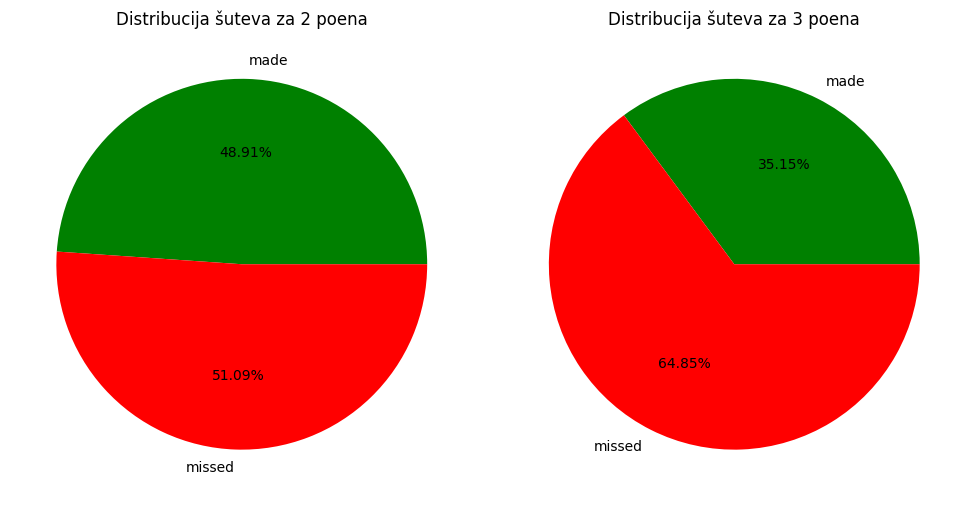

In [96]:
data = shot_data.groupby(['PTS_TYPE', 'SHOT_RESULT']).size().unstack().fillna(0)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(data.loc[2], labels=['made', 'missed'], autopct='%.2f%%', colors=['green', 'red'])
axs[0].set_title('Distribucija šuteva za 2 poena')

axs[1].pie(data.loc[3], labels=['made', 'missed'], autopct='%.2f%%', colors=['green', 'red'])
axs[1].set_title('Distribucija šuteva za 3 poena')

plt.tight_layout()
plt.show()

Također, možemo prikazati pitni graf samo ciljne varijable.

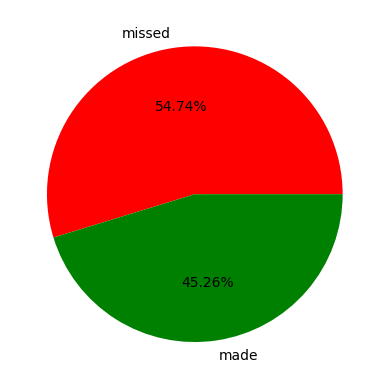

In [95]:
shot_data_values = shot_data['SHOT_RESULT'].value_counts()
plt.pie(shot_data_values, labels=shot_data_values.index, autopct='%.2f%%', colors=['red', 'green'])
plt.show()

Za značajku SHOT_DIST prikazat ćemo histogram.

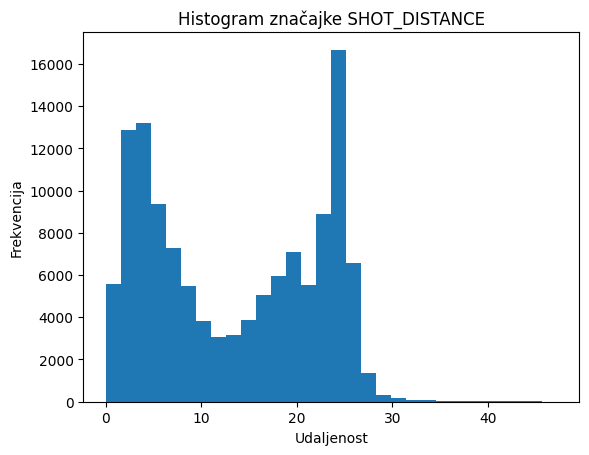

In [101]:
plt.hist(shot_data['SHOT_DIST'], bins=30)
plt.xlabel('Udaljenost')
plt.ylabel('Frekvencija')
plt.title('Histogram značajke SHOT_DISTANCE')
plt.show()

Značajku SHOT_CLOCK možemo prikazati boxplotom.

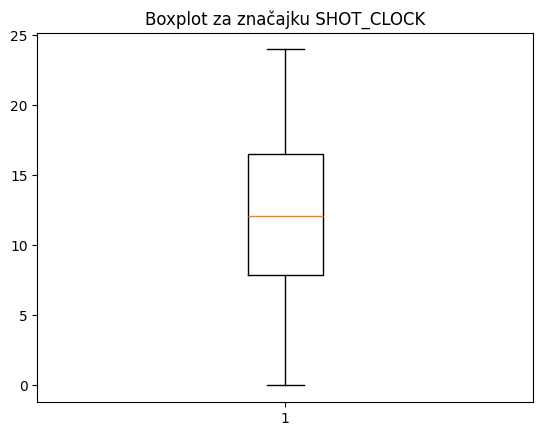

In [102]:
plt.boxplot(shot_data['SHOT_CLOCK'], showfliers=False)
plt.title('Boxplot za značajku SHOT_CLOCK')
plt.show()

Možemo napraviti i točkasti dijagram za SHOT_DISTANCE i SHOT_CLOCK u ovisnosti o ciljnoj varijabli SHOT_RESULT.

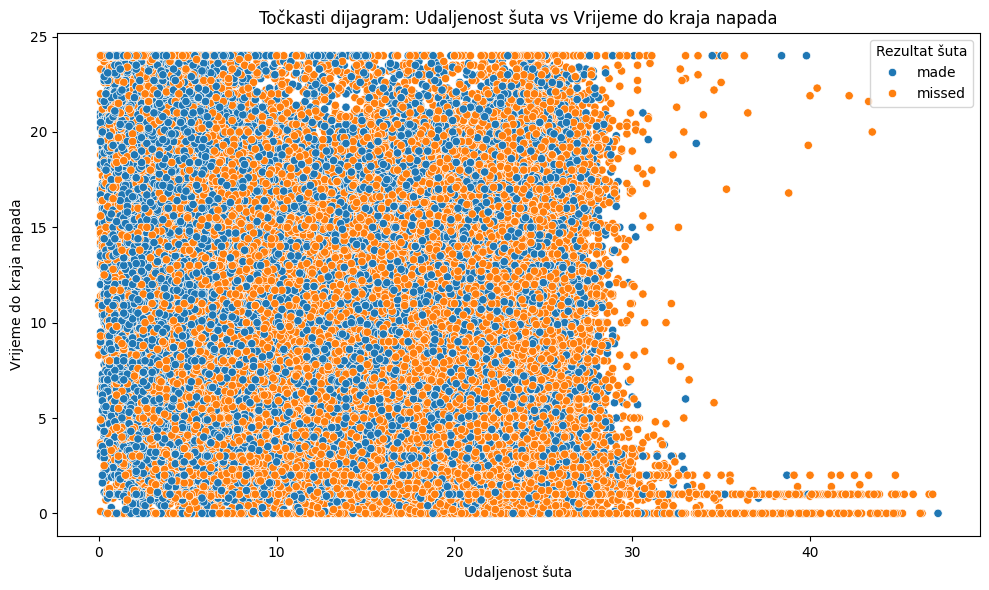

In [107]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='SHOT_DIST', y='SHOT_CLOCK', hue='SHOT_RESULT', data=shot_data)

plt.title('Točkasti dijagram: Udaljenost šuta vs Vrijeme do kraja napada')
plt.xlabel('Udaljenost šuta')
plt.ylabel('Vrijeme do kraja napada')
plt.legend(title='Rezultat šuta', loc='best')

plt.tight_layout()
plt.show()

Vidimo da je uspješnost veća što je udaljenost manja, dok je za vrijeme držanja lopte podjednako raspodijeljeno, iako se čini da više uspješnih šuteva ima kada je više vremena do kraja napada (u gornjem dijelu grafa). Zanimljivo je primijetiti kako ima jako malo uspješnih pokušaja kada vrijeme do kraja napada teži u nulu.